<AxesSubplot:>

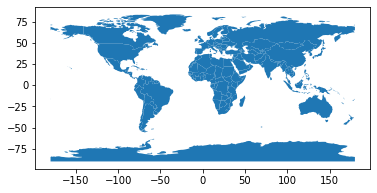

In [2]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry']]

world.plot()

,geometry
continent,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6..."
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012..."
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13..."
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2..."
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421..."


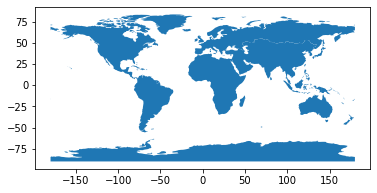

In [3]:
# disolve the country borders to make continents 
continents = world.dissolve(by='continent')

continents.plot();

continents.head()

What if we're interested in studdy populations? 

We could use the `aggfunc` keyword on `dissolve` to set new behavior

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1219176238
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4050
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4389144868
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",746398461
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",573042112


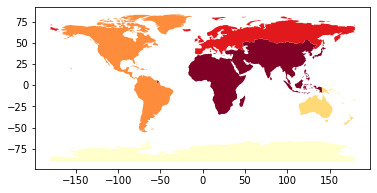

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry', 'pop_est']]

# sum the pop in each continent and dissolve state lines in process
continents = world.dissolve(by='continent', aggfunc='sum')

continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');

continents.head()

We can even define a dict `aggfunc` that specifies particular aggregation functions for different columns on the dataset.

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.dissolve(by='continent', aggfunc={'pop_est': 'sum', 'gdp_md_est': 'mean'}).head()

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1219176238,1.181430e+05
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4050,8.100000e+02
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4389144868,1.179460e+06
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",746398461,6.483302e+05
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",573042112,1.305841e+06
